Import Libraries & Data

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv(r"C:\Users\minhq\Downloads\DATA ANALYSIS\Full Datasets for Projects\Amazon Sale Report Project\data\cleaned_data.csv", parse_dates = ["Date"])

In [8]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship_city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,110791,406-5149188-9232359,2022-06-13,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-XL,Kurta,...,1,INR,432.0,Bengaluru,Karnataka,560066.0,IN,None,False,Not Specified
1,61836,405-2996475-6588332,2022-05-21,Shipped,Amazon,Amazon.in,Expedited,JNE3376,JNE3376-KR-XL,Kurta,...,1,INR,432.0,Bengaluru,Karnataka,560043.0,IN,None,False,Not Specified
2,117150,408-1266602-2622706,2022-06-08,Shipped,Amazon,Amazon.in,Expedited,J0353,J0353-KR-XL,Kurta,...,1,INR,635.0,Bengaluru,Karnataka,560094.0,IN,None,False,Not Specified
3,117145,403-5456957-0341951,2022-06-08,Shipped,Amazon,Amazon.in,Expedited,JNE3368,JNE3368-KR-XL,Kurta,...,1,INR,471.0,Bengaluru,Karnataka,560059.0,IN,None,False,Not Specified
4,68777,403-3769681-0810727,2022-05-15,Shipped,Amazon,Amazon.in,Expedited,JNE3487,JNE3487-KR-XL,Kurta,...,1,INR,345.0,Bengaluru,Karnataka,560097.0,IN,None,False,Not Specified


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74538 entries, 0 to 74537
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               74538 non-null  int64         
 1   Order ID            74538 non-null  object        
 2   Date                74538 non-null  datetime64[ns]
 3   Status              74538 non-null  object        
 4   Fulfilment          74538 non-null  object        
 5   Sales Channel       74538 non-null  object        
 6   ship-service-level  74538 non-null  object        
 7   Style               74538 non-null  object        
 8   SKU                 74538 non-null  object        
 9   Category            74538 non-null  object        
 10  Size                74538 non-null  object        
 11  ASIN                74538 non-null  object        
 12  Courier Status      70766 non-null  object        
 13  Qty                 74538 non-null  int64     

Visualize Sales Trends

In [10]:
df.set_index("Date", inplace=True)
df = df.sort_index()

In [11]:
df_resampled = df.resample("W")["Amount"].sum() #Resample to group by weekly

In [ ]:
df_resampled = df_resampled.to_frame().rename(columns={df_resampled.name: "Amount"})
print(df_resampled.head())

                Amount
Date                  
2022-05-01  1090798.19
2022-05-08  6716700.42
2022-05-15  4990092.28
2022-05-22  4950965.53
2022-05-29  5209968.40


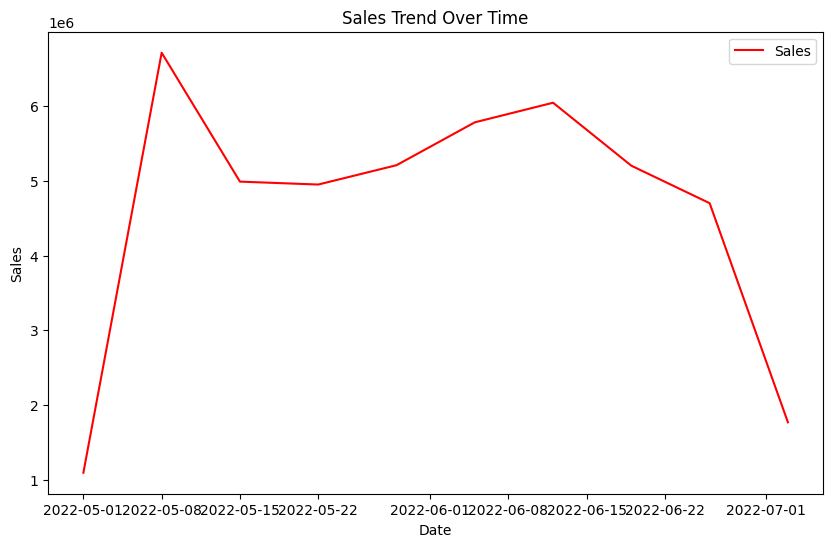

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_resampled.index, df_resampled["Amount"], label="Sales", color="red")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.legend()
plt.show()
